### AMAZON_SALES_DATA_ANALYSIS

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### LOAD THE DATA

In [2]:
data = pd.read_feather(r"C:\Users\homer\Desktop\00\Amazon_Sales_Data_Analysis-main/data.ftr")

In [3]:
data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
data.describe(include='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [5]:
data.info

<bound method DataFrame.info of        Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1          None                        None             None       None   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0

In [6]:
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


array([[<Axes: title={'center': 'Quantity Ordered'}>,
        <Axes: title={'center': 'Price Each'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

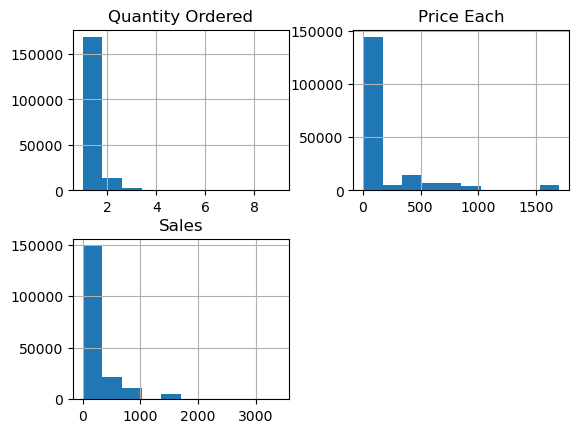

In [39]:
data.hist()

In [8]:
data.shape

(186850, 6)

### DATA CLEANING AND FORMATTIG 

In [9]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
data[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
356,None,None,None,None,None,None
735,None,None,None,None,None,None
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"
186785,259297,Lightning Charging Cable,1,14.95,09/15/19 18:54,"138 Main St, Boston, MA 02215"


In [11]:
data = data.drop_duplicates()

In [12]:
data.shape

(185688, 6)

### DATA ANALYSIS

## prob_1: which month has the max sale?

In [36]:
def return_month(x):
    if x is not None:
        return x.split('/')[0]
    else:
        return None

In [37]:
data['Month'] = data['Order Date'].apply(return_month)

In [38]:
data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
Sales               float64
city                 object
dtype: object

In [16]:
print(data['Month'].unique())

['04' None '05' 'Order Date' '08' '09' '12' '01' '02' '03' '07' '06' '11'
 '10']


In [17]:
import warnings 
from warnings import filterwarnings as fwa
fwa('ignore')

In [18]:
data['Month'] = data['Month'].replace('Order Date', pd.NA)
data = data.dropna(subset=['Month'])
data['Month'] = data['Month'].astype(int)
data.replace(([np.inf, -np.inf]), pd.NA , inplace= True)
data['Month'].unique()

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10])

In [19]:
data['Quantity Ordered'] = data['Quantity Ordered'].astype(int)
data['Price Each'] = data['Price Each'].astype(float)
data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

<Axes: xlabel='Month'>

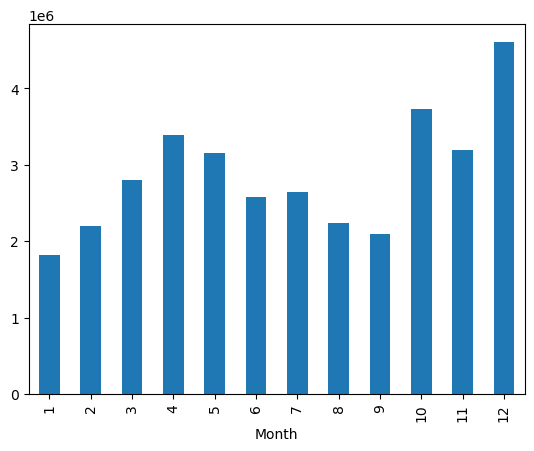

In [20]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']
data.groupby(['Month'])['Sales'].sum() 
data.groupby(['Month'])['Sales'].sum().plot(kind='bar')

SO THE RESULT IS THAT DECEMPER MONTH HAS THE MAX SALES!

## prob_2: which city has the max order?

In [21]:
data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [22]:
data['Purchase Address'][0]

'917 1st St, Dallas, TX 75001'

In [23]:
data['city'] = data['Purchase Address'].str.split(',').str.get(1) # .str
data['city'].tail()

186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: city, dtype: object

<Axes: ylabel='city'>

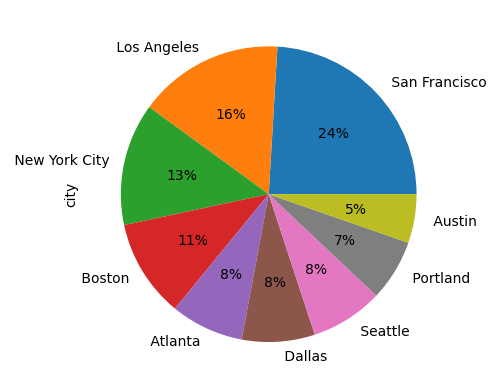

In [24]:
pd.value_counts(data['city']).plot(kind ='pie', autopct = '%1.f%%')


<Axes: >

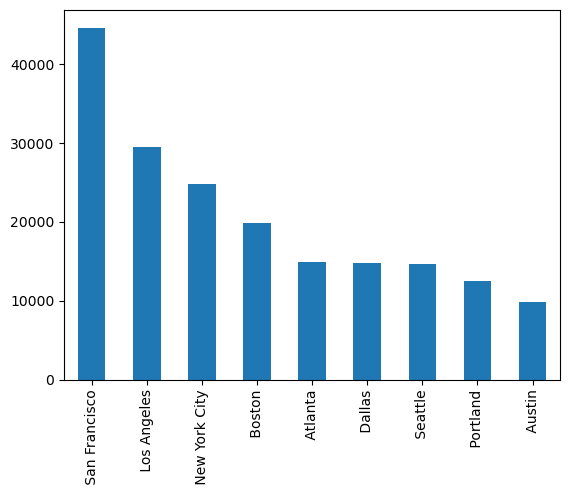

In [25]:
pd.value_counts(data['city']).plot(kind ='bar')

<Axes: >

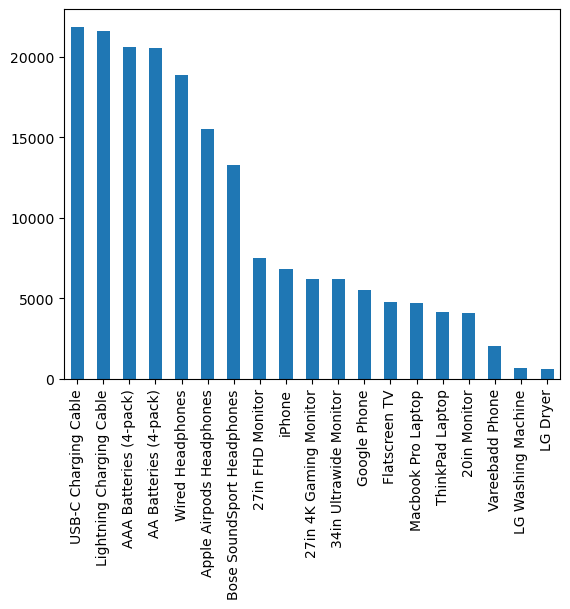

In [26]:
data['Product'].value_counts().plot(kind ='bar')

In [27]:
data[['Quantity Ordered','Price Each']].corr()

,Quantity Ordered,Price Each
Quantity Ordered,1.000000,-0.148422
Price Each,-0.148422,1.000000


# INSIGHTS

#### San francisco has the max orders with a percentage of 24% !

#### Austin has the minimum number of orders with a percentage of 5% !

#### More than 50% of orders placed in 3 cities {San francisco , New york and Los Angeles}.


# prob_3: what is the max sold product and  corr with prices? 

In [28]:
df = data
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'city'],
      dtype='object')

In [29]:
df1=df.groupby('Product').agg({'Quantity Ordered': 'sum', 'Price Each': 'mean'}).reset_index()
df1

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


array([<Axes: title={'center': 'Quantity Ordered'}>,
       <Axes: title={'center': 'Price Each'}>], dtype=object)

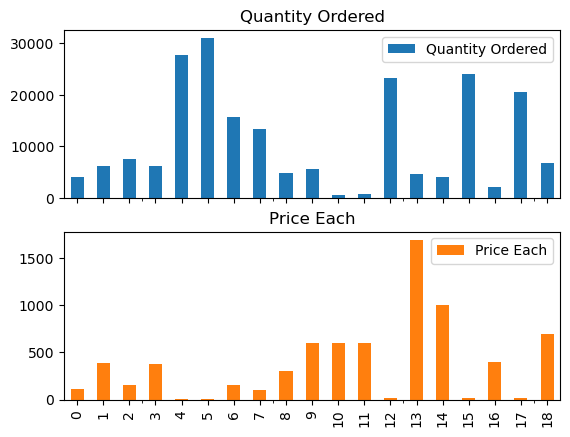

In [30]:
df1.plot(kind='bar', subplots=True)

In [31]:
products= df['Product'].values
products

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', ..., 'iPhone', '34in Ultrawide Monitor',
       'USB-C Charging Cable'], dtype=object)

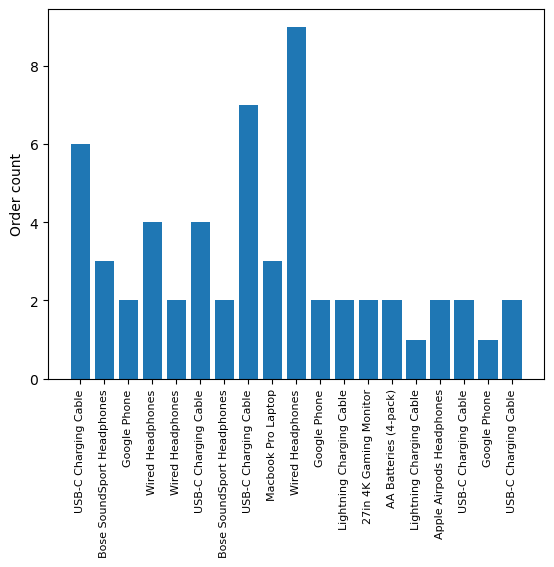

In [181]:
x1, ax1 = plt.subplots()

ax1.bar(df['Product'], df['Quantity Ordered'])

ax1.set_xticklabels(df['Product'], rotation='vertical', fontsize=8)
ax1.set_ylabel('Order count')

plt.show()

## INSIGHTS

THE TOP SELLING PRODUCT IS 'AAA BATARRIES'.


THE TOP SELLING PRODUCT SEEMS TO HAVE A POSITIVE CORRLATION WITH THE PRICE OF THE PRODUCTS.


THE HIGHER QUANTITY ORDERED THE CHEAPER  OF ITS PRODUCTS.

THE 'WIRE HEADPHONES' HAS THE MAX NUMBER OF ORDERED QUANTITY.

# # prob_4: what is the top sold product?

In [32]:
df['Product'].value_counts()[0:10].index.to_frame()

,0
USB-C Charging Cable,USB-C Charging Cable
Lightning Charging Cable,Lightning Charging Cable
AAA Batteries (4-pack),AAA Batteries (4-pack)
AA Batteries (4-pack),AA Batteries (4-pack)
Wired Headphones,Wired Headphones
Apple Airpods Headphones,Apple Airpods Headphones
Bose SoundSport Headphones,Bose SoundSport Headphones
27in FHD Monitor,27in FHD Monitor
iPhone,iPhone
27in 4K Gaming Monitor,27in 4K Gaming Monitor


In [33]:
most_sold_product = data['Product'].value_counts()[0:10].index
most_sold_product

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones',
       'Apple Airpods Headphones', 'Bose SoundSport Headphones',
       '27in FHD Monitor', 'iPhone', '27in 4K Gaming Monitor'],
      dtype='object')

In [34]:
most_sold_product_df = data[data['Product'].isin(most_sold_product)]

In [35]:
most_sold_product_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco


In [43]:
most_sold_product_df.groupby(['Month','Product']).size()

Month  Product                   
1      27in 4K Gaming Monitor         313
       27in FHD Monitor               421
       AA Batteries (4-pack)         1037
       AAA Batteries (4-pack)        1084
       Apple Airpods Headphones       812
                                     ... 
12     Bose SoundSport Headphones    1803
       Lightning Charging Cable      2887
       USB-C Charging Cable          2979
       Wired Headphones              2537
       iPhone                         906
Length: 120, dtype: int64

In [44]:
pivt_tbl = most_sold_product_df.groupby(['Month', 'Product']).size().unstack()

In [45]:
pivt_tbl

Product,27in 4K Gaming Monitor,27in FHD Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Lightning Charging Cable,USB-C Charging Cable,Wired Headphones,iPhone
Month,,,,,,,,,,
1,313,421,1037,1084,812,659,1069,1171,1004,381
2,424,471,1274,1320,1009,829,1393,1511,1179,438
3,478,605,1672,1645,1308,1181,1749,1766,1512,537
4,564,733,2062,1988,1507,1277,2197,2074,1888,691
5,541,688,1821,1888,1354,1165,1929,1879,1729,640
6,451,561,1540,1451,1152,969,1560,1531,1334,532
7,483,601,1555,1554,1212,1048,1690,1667,1434,501
8,437,484,1357,1340,998,871,1354,1339,1191,439
9,380,478,1314,1281,961,824,1324,1451,1173,396


<Axes: xlabel='Month'>

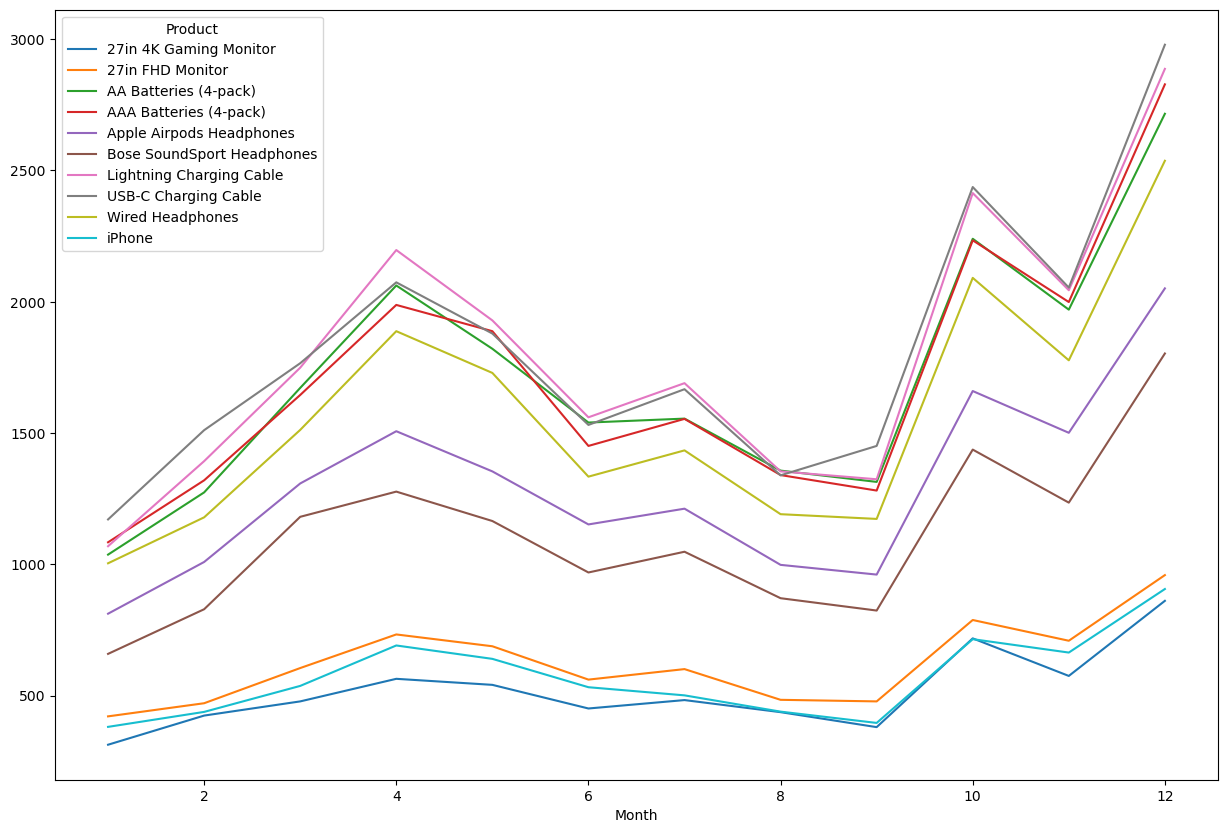

In [46]:
pivt_tbl.plot(figsize=(15,10))

DECEMBER MONTH HAS THE MAX SOLD PRODUCTS!

SEPTEMBER MONTH IS  THE MINIMUM OF SOLDING PRODUCTS

MONTHS THAT HAS THE MAX SOLD PRODUCTS ARE {4,7,10,12}

# Conclusion:

Based on the comprehensive analysis of the Amazon sales data, several key conclusions can be drawn:

1. Seasonal Sales Patterns:

• December consistently stands out as the month with the highest sales, possibly due to increased holiday shopping.

• Sales tend to peak in April, October, November, and December, indicating potential opportunities for targeted promotions during these months.

2. Geographical Sales Distribution:

San Francisco emerges as the city with the highest number of orders, followed by New York and Los Angeles. • These three cities contribute to more than half of the total orders, suggesting a concentrated customer base in these areas.

3. Product Performance and Pricing:

'USB chrging cabel' is the top-selling product, possibly due to its essential and frequently replaced nature.

The inverse correlation between product price and quantity ordered suggests customers are more willing to purchase lower- priced items in larger quantities.

4. Recommendation System Insights:

The analysis provides crucial insights for building a recommendation system.

• Identifying products that are frequently sold together can guide personalized product suggestions to customers, enhancing their shopping experience.

5. Data Quality and Cleaning:

Data cleaning steps, including handling missing values and removing duplicates, were performed effectively to ensure the accuracy of the analysis.

In conclusion, the analysis showcases valuable insights into sales trends, customer behavior, and potential business strategies. These insights can drive decision-making processes, such as targeted marketing campaigns during peak sales months, refining product pricing and bundling strategies, and developing a recommendation system to enhance customer satisfaction and increase sales revenue.